# Part 01

The data is leaded from url and is explored to select the appropriate variables.

In [1]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [2]:
import sys
print(sys.executable)

/Users/amin/Desktop/proj/env/bin/python


In [3]:
# !/Users/amin/Desktop/proj/env/bin/python -m pip install matplotlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
from zipfile import ZipFile
import os

uri = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"
zip_path = keras.utils.get_file(origin=uri, 
                                fname="jena_climate_2009_2016.csv.zip")
zip_file = ZipFile(zip_path)
zip_file.extractall()

save the data frame into the Data folder

In [34]:
import shutil

# determine the src address and dist address
src_dir = "../Code/jena_climate_2009_2016.csv"
dst_dir = "../Data/jena_climate_2009_2016.csv"

# copy img from src to dist
shutil.copy(src_dir, dst_dir)

'../Data/jena_climate_2009_2016.csv'

In [22]:
# !mv jena_climate_2009_2016.csv.zip ~/Data/jena_climate_2009_2016.csv.zip

mv: jena_climate_2009_2016.csv.zip: No such file or directory


In [35]:
csv_path = "../Data/jena_climate_2009_2016.csv"
df = pd.read_csv(csv_path)

In [214]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [215]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [216]:
df.columns.size

15

In [217]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Tpot (K),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
Tdew (degC),420551.0,4.955854,6.730674,-25.01,0.24,5.22,10.07,23.11
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
H2OC (mmol/mol),420551.0,9.640223,4.235395,0.80,6.29,8.96,12.49,28.82


In [218]:
df.corr().T

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
p (mbar),1.000000,-0.045375,-0.124718,-0.066755,-0.018352,-0.031546,-0.054370,-0.003401,-0.069762,-0.069804,0.307640,-0.005701,-0.007760,-0.063258
T (degC),-0.045375,1.000000,0.996827,0.895708,-0.572416,0.951113,0.867673,0.761744,0.866755,0.867177,-0.963410,-0.004689,-0.002871,0.038732
Tpot (K),-0.124718,0.996827,1.000000,0.894911,-0.567127,0.947293,0.866205,0.756962,0.866533,0.866955,-0.981345,-0.004195,-0.002224,0.043599
Tdew (degC),-0.066755,0.895708,0.894911,1.000000,-0.156615,0.799271,0.968344,0.435752,0.967599,0.968044,-0.885232,-0.008718,-0.009091,0.049877
rh (%),-0.018352,-0.572416,-0.567127,-0.156615,1.000000,-0.615842,-0.151494,-0.843835,-0.150841,-0.150969,0.514282,-0.005020,-0.009921,-0.015912
VPmax (mbar),-0.031546,0.951113,0.947293,0.799271,-0.615842,1.000000,0.824865,0.875588,0.824460,0.824493,-0.901536,-0.004018,-0.002213,-0.009583
VPact (mbar),-0.054370,0.867673,0.866205,0.968344,-0.151494,0.824865,1.000000,0.449154,0.999851,0.999856,-0.850241,-0.009600,-0.010316,0.018418
VPdef (mbar),-0.003401,0.761744,0.756962,0.435752,-0.843835,0.875588,0.449154,1.000000,0.448641,0.448689,-0.698290,0.001852,0.005317,-0.030881
sh (g/kg),-0.069762,0.866755,0.866533,0.967599,-0.150841,0.824460,0.999851,0.448641,1.000000,0.999997,-0.853325,-0.009479,-0.010163,0.019376
H2OC (mmol/mol),-0.069804,0.867177,0.866955,0.968044,-0.150969,0.824493,0.999856,0.448689,0.999997,1.000000,-0.853769,-0.009477,-0.010158,0.019607


Select the parameters considering the corr values.

In [219]:
# (pd.DataFrame(df.corr().T['p (mbar)'])).size
# (pd.DataFrame(df.corr().T['p (mbar)']))
# df.corr().T['p (mbar)'].size

In [220]:
# df.corr().T['p (mbar)']

In [221]:
df.corr().T['p (mbar)'].mean()

0.0533456593950841

In [222]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [269]:
cols = ['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)']

In [272]:
counter = 0
selected_pars = []
for i in list(df.corr().T['p (mbar)']):
    counter +=1
    if i > 0.05 or i < -0.05:
#         print(cols[counter])
#         print(i,'\n')
        selected_pars.append(cols[counter])
selected_pars  

['p (mbar)',
 'Tpot (K)',
 'Tdew (degC)',
 'VPact (mbar)',
 'sh (g/kg)',
 'H2OC (mmol/mol)',
 'rho (g/m**3)',
 'wd (deg)']

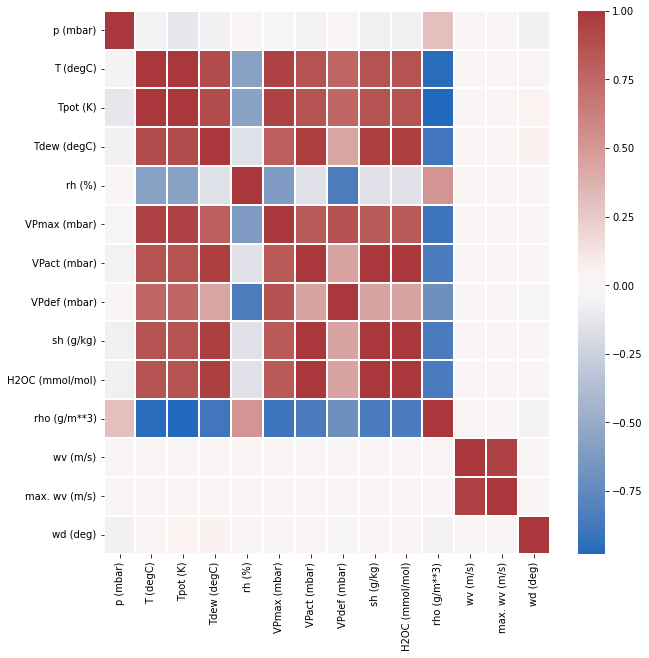

In [274]:
data_counts_corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data_counts_corr, 
            xticklabels=data_counts_corr.columns,
            yticklabels=data_counts_corr.columns,
            cmap='vlag',
            annot=False,
            linewidth=0.2)
plt.savefig("../Figures/plot_01_01.png")

Let's narrow down the corr upper and lower values so the relationship between parameters in the heatmap plot would be more clear.

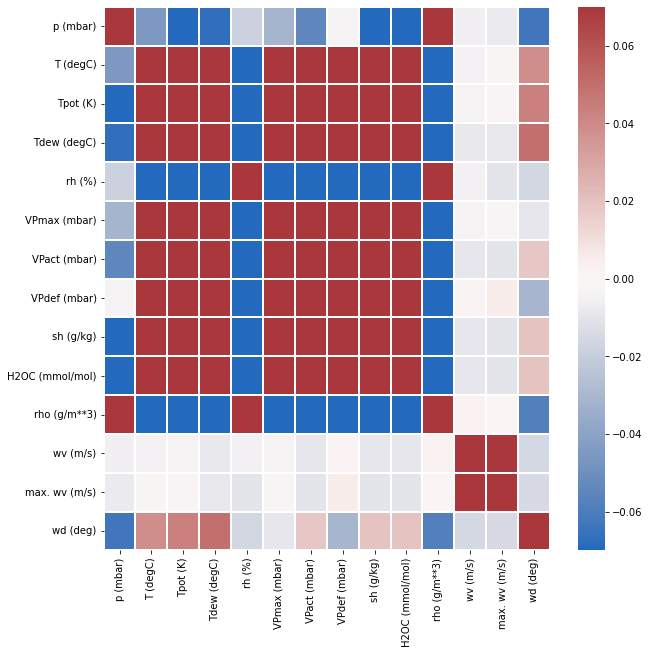

In [273]:
data_counts_corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data_counts_corr, 
            xticklabels=data_counts_corr.columns,
            yticklabels=data_counts_corr.columns,
            cmap='vlag',
            annot=False,
            linewidth=0.2,
            vmin=-0.07, vmax=0.07)
plt.savefig("../Figures/plot_01_02.png")

### Lets practice some stat test on data

I beileve that because of number of rows are large (half a million), there is enough evidence to come up with conclusion for mean and std (or any other criteris or hypothesis). But i would like exercise the t-test in python (i prefer R tho). I choose two columns including ```Tdew (degC)``` and ```T (degC)```. At the following I check the mean and it is clear that there is little bit difference.

In [225]:
# !pip install seaborn
# !/Users/amin/Desktop/proj/env/bin/python -m pip install seaborn

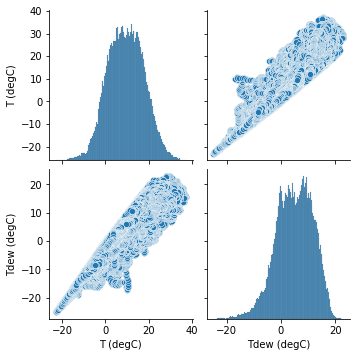

In [226]:
cols = ['T (degC)','Tdew (degC)']

sns.pairplot(df[cols],
             kind='scatter')
plt.show()

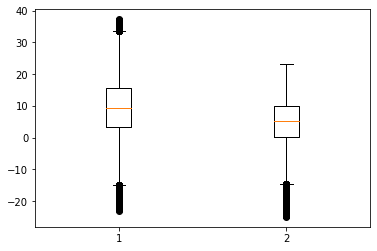

In [227]:
cols = ['T (degC)', 'Tdew (degC)']

plt.boxplot(df[cols])

plt.show()

Is there any difference between mean of ```Tdew (degC)``` and ```T (degC)```?
lets check out the mean and std of two parameters first.

In [228]:
print('T (degC) mean = ', df['T (degC)'].mean())
print('Tdew (degC) mean = ', df['Tdew (degC)'].mean())
print("======")
print('T (degC) std = ', df['T (degC)'].std())
print('Tdew (degC) std = ', df['Tdew (degC)'].std())

T (degC) mean =  9.450147354304233
Tdew (degC) mean =  4.955853844123543
T (degC) std =  8.423365210385153
Tdew (degC) std =  6.730674307693392


it looks like there is a difference between the mean! Let's use the t-test and find out if this is not because of an error in tests!
Most conservative statisticians believe the that null hypothesis is correct as long as evidence (statistics tools and methods) shows the opposite.
Here I present the null hypothesis (H0): there is no difference between means for ```Tdew (degC)``` and ```T (degC)```.
Now let's use t-test and check out the p-values.

In [229]:
# ref : https://data-flair.training/blogs/python-statistics/
import scipy.stats as stats
stats.ttest_rel(a=df['T (degC)'],
                b=df['Tdew (degC)'])

Ttest_relResult(statistic=760.4091806697171, pvalue=0.0)

In [230]:
stats.ks_2samp(df['T (degC)'],df['Tdew (degC)'])

KstestResult(statistic=0.23514627239026897, pvalue=0.0)

well the H0 is rejected cuz the p-value < 0.05. And there is a difference between two parameters mean.

Now lets see if we had small number of test how it would affect the our H0 and p-value. A sub dataframe is extracted at the following. 

In [231]:
sub_df = df.head(100)

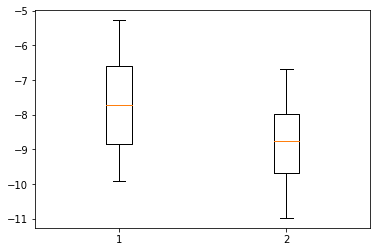

In [232]:
cols = ['T (degC)', 'Tdew (degC)']
plt.boxplot(sub_df[cols])
plt.show()

In [233]:
print('T (degC) mean = ', sub_df['T (degC)'].mean())
print('Tdew (degC) mean = ', sub_df['Tdew (degC)'].mean())

T (degC) mean =  -7.6528
Tdew (degC) mean =  -8.7744


In [234]:
# ref : https://data-flair.training/blogs/python-statistics/
stats.ttest_rel(a=sub_df['T (degC)'],
                b=sub_df['Tdew (degC)'])

Ttest_relResult(statistic=43.61903866308778, pvalue=1.9026667450635816e-66)

it looks like even with 100 data points we can conclude that there is a difference in mean of two parameters for sure. In practice, we always have to have a hypothesis in hand in advance and then do our experiments and check the t-test (or any test that provides us with p-value). Just looking at two parameters from data and conducting t-test to come up with a new hypothesis solely based on p-value is called p-value hacking.

The essential parameters to be considered for modeling are as follows.

```
'p (mbar)','Tpot (K)','Tdew (degC)','VPact (mbar)','sh (g/kg)','H2OC (mmol/mol)','rho (g/m**3)','wd (deg)'
```